In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

import easyocr

In [2]:
import mediapipe as mp

1. Aligning and Orienting the Image

Text(0.5, 1.0, 'Homework Sheet')

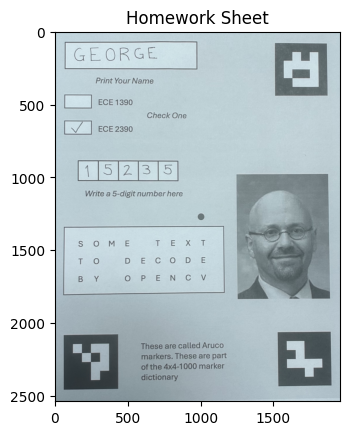

In [3]:
# Load the image
image = cv2.imread('Homework8Written.jpg')

# Rotate or transform the image (example for rotation)
center = (image.shape[1]//2, image.shape[0]//2)
matrix = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated_image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

plt.imshow(image);plt.title('Homework Sheet')

2. Reading the Name Box using EasyOCR

In [4]:
if image is None:
    print("Error: Image not found!")
else:
    height, width, _ = image.shape
    print(f"Image dimensions: {height}x{width}")

Image dimensions: 2537x1960


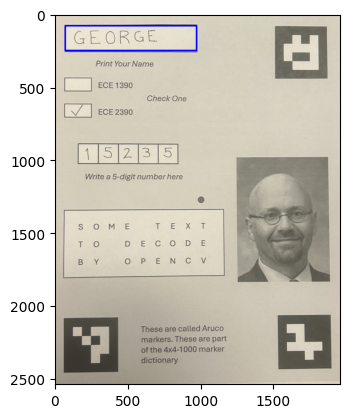

In [5]:
start_x, start_y = 70, 80
end_x, end_y = 970,250

# Draw a rectangle around the region of interest
image_with_box = image.copy()
cv2.rectangle(image_with_box, (start_x, start_y), (end_x, end_y), (255, 0, 0), 10)

# Convert image to RGB (from BGR) for displaying in Matplotlib
image_rgb = cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the box
plt.imshow(image_rgb)
plt.show()

In [6]:
reader = easyocr.Reader(['en'])

 # Extract the region of interest (ROI) from the image
name_box = image[start_y:end_y, start_x:end_x]  # The region to extract

# Perform OCR on the region
result = reader.readtext(name_box)

# Output the result
if result:
    print("Name detected:", result[0][1])  # The detected text is in the second element of the result
else:
    print("No text detected.")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Name detected: GEOR GE


3. Checking Which Checkbox is Marked

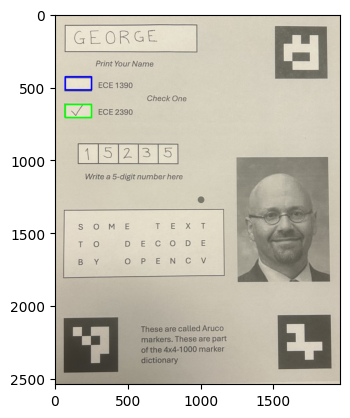

In [7]:
start_x, start_y = 70, 430
end_x, end_y = 250,520

# Draw a rectangle around the region of interest
image_with_box = image.copy()
cv2.rectangle(image_with_box, (start_x, start_y), (end_x, end_y), (255, 0, 0), 10)

# +190 . Keep in Mind
cv2.rectangle(image_with_box, (start_x, start_y+190), (end_x, end_y+190), (0, 255, 0), 10)

# Convert image to RGB (from BGR) for displaying in Matplotlib
image_rgb = cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the box
plt.imshow(image_rgb)
plt.show()

In [8]:
checkbox_1390 = image[start_y:end_y, start_x:end_x]  # Coordinates for checkbox 1390
checkbox_2390 = image[start_y+190:end_y+190, start_x:end_x]  # Coordinates for checkbox 2390

# Calculate intensity (sum of pixel values or average pixel intensity)
intensity_1390 = np.sum(checkbox_1390)
intensity_2390 = np.sum(checkbox_2390)

if intensity_1390 < intensity_2390:
    print("ECE-1390 checkbox is marked")
else:
    print("ECE-2390 checkbox is marked")


ECE-2390 checkbox is marked


4. Deconding the 5-Digit Number Using OCR

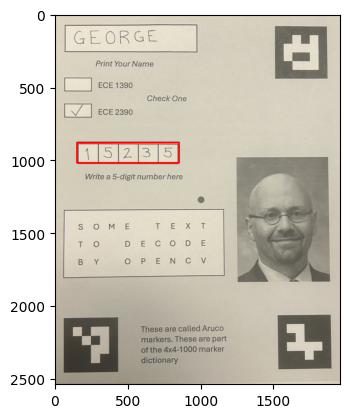

In [9]:
start_x, start_y = 150, 880
end_x, end_y = 850,1020

# Draw a rectangle around the region of interest
image_with_box = image.copy()
cv2.rectangle(image_with_box, (start_x, start_y), (end_x, end_y), (0, 0, 255), 10)

# Convert image to RGB (from BGR) for displaying in Matplotlib
image_rgb = cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the box
plt.imshow(image_rgb)
plt.show()

In [10]:
# Define the area for the 5-digit number
number_area = image[start_y:end_y, start_x:end_x]  # Coordinates for the 5-digit area

result = reader.readtext(number_area)
print("5-Digit Number detected:", result[0][1])


5-Digit Number detected: 5


5. Reading Text Using Tesseract OCR

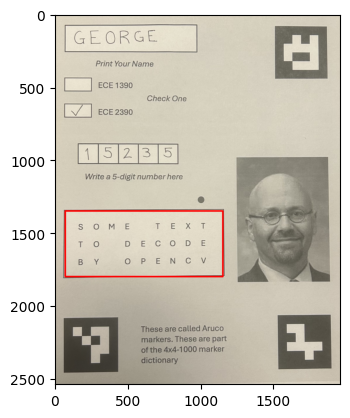

In [11]:
start_x, start_y = 70, 1350
end_x, end_y = 1150,1800

# Draw a rectangle around the region of interest
image_with_box = image.copy()
cv2.rectangle(image_with_box, (start_x, start_y), (end_x, end_y), (0, 0, 255), 10)

# Convert image to RGB (from BGR) for displaying in Matplotlib
image_rgb = cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the box
plt.imshow(image_rgb)
plt.show()

In [12]:
import pytesseract

# Specify the coordinates for the text box
text_box = image[start_y:end_y, start_x:end_x]  # Adjust coordinates for the text box
text = pytesseract.image_to_string(text_box)

print("Text detected:", text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

6. Using MediaPipe to Detect Facial Features

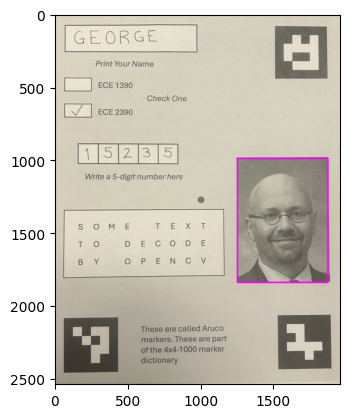

In [ ]:
start_x, start_y = 1250, 990
end_x, end_y = 1870,1840

# Draw a rectangle around the region of interest
image_with_box = image.copy()
cv2.rectangle(image_with_box, (start_x, start_y), (end_x, end_y), (255, 0, 255), 10)

# Convert image to RGB (from BGR) for displaying in Matplotlib
image_rgb = cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the box
plt.imshow(image_rgb)
plt.show()

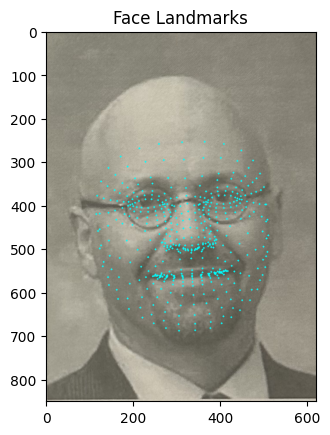

In [ ]:
# Assuming image_face is already cropped and contains the region of interest with the face
image_face = image[start_y:end_y, start_x:end_x]

# Initialize MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Process the image to detect landmarks
results = face_mesh.process(cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB))

# Check if landmarks are detected
if results.multi_face_landmarks:
    # Iterate through the detected landmarks for each face
    for face_landmarks in results.multi_face_landmarks:
        # Draw landmarks on the image
        for landmark in face_landmarks.landmark:
            # Convert normalized coordinates to pixel values
            x = int(landmark.x * image_face.shape[1])  # Width
            y = int(landmark.y * image_face.shape[0])  # Height

            # Draw the circle at each landmark
            cv2.circle(image_face, (x, y), 2, (255, 255, 0), -1)  # Blue color, 2px radius

    # Display the image with landmarks
    plt.imshow(cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB))
    plt.title('Face Landmarks')
    plt.show()
else:
    print("No faces detected or landmarks found.")